<a href="https://colab.research.google.com/github/PRIMEADAWAS/CEB_Assignment/blob/main/RADI608_A4_PasitSupholkhan_(Assignment_Support_Vector_Machine_%26_kNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# RADI608_A4_PasitSupholkhan (Assignment: Support Vector Machine & kNN)

**Assignment :Support Vector Machine & kNN**

RADI 608, 602: Data Mining and Machine Learning 2022

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
print('Pandas version :',pd.__version__)
print('Numpy version :',np.__version__)
print('Matplotlib version :',mpl.__version__)

Pandas version : 1.3.5
Numpy version : 1.21.6
Matplotlib version : 3.2.2


# Assignment: SVM -due on 11 November, 2022 (10 points) 

## 1.(3 points) From data: (-2,1) class 1, (-2,-1) class -1, (-1,-1.5) class -1,(1,1) class 1, (1.5, -0.5) class 1, (2,-2) class -1 Find a vector w and bias b, please show the calculation step by step as same as example 1 If the support vectors are (1.5, -0.5) and (2,-2) 

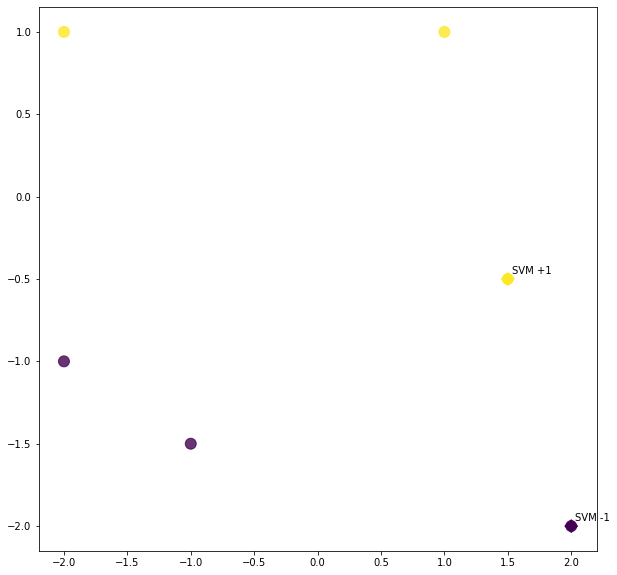

$$a_1 \phi(s1).\phi(s1) + a_2 \phi(s2).\phi(s1) = +1$$  
$$a_1 \phi(s1).\phi(s2) + a_2 \phi(s2).\phi(s2) = -1$$

$$S1 = \begin{bmatrix}1.5\\-0.5\\1 \end{bmatrix}$$

$$S2 = \begin{bmatrix}2\\-2\\1 \end{bmatrix}$$

$$a_1 \begin{bmatrix}1.5\\-0.5\\1 \end{bmatrix}.\begin{bmatrix}1.5\\-0.5\\1 \end{bmatrix} + a_2 \begin{bmatrix}2\\-2\\1 \end{bmatrix}.\begin{bmatrix}1.5\\-0.5\\1 \end{bmatrix} = +1$$  
$$a_1 \begin{bmatrix}1.5\\-0.5\\1 \end{bmatrix}.\begin{bmatrix}2\\-2\\1 \end{bmatrix} + a_2 \begin{bmatrix}2\\-2\\1 \end{bmatrix}.\begin{bmatrix}2\\-2\\1 \end{bmatrix} = 1$$


$$a_1 3.5 + a_2 5 = +1 <-(1)$$  
$$a_1 5 + a_2 9 = -1 <-(2)$$
(2)-(10/7)*(1)
$$a_2 \frac{13}{7} = -\frac{17}{7} $$ 

$$a_2 = -\frac{17}{13} $$ 


then 
$$a_1 3.5 -\frac{17}{13}* 5 = +1 <-(1)$$ 

$$a_1 \frac{7}{2} = \frac{98}{13} $$

$$a_1 = \frac{28}{13} $$ 


$$W = \Sigma_{i=1}^n {a_is_i} = a_1.s_1 + a_2.s_2$$

$$W = \frac{28}{13}.\begin{pmatrix}1.5\\-0.5\\1 \end{pmatrix} - \frac{17}{13}.\begin{pmatrix}2\\-2\\1 \end{pmatrix}$$

$$W = \begin{pmatrix}\frac{42}{13}\\-\frac{14}{13}\\\frac{28}{13} \end{pmatrix} + \begin{pmatrix}-\frac{34}{13}\\\frac{34}{13}\\-\frac{17}{13} \end{pmatrix}$$


$$W = \begin{pmatrix}\frac{8}{13}\\\frac{20}{13}\\\frac{11}{13} \end{pmatrix} $$

8/13 20/13 11/13


$$W^T*\begin{pmatrix}x\\y\end{pmatrix} + b = 0$$

$$\begin{pmatrix}\frac{8}{13} & \frac{20}{13}\end{pmatrix}*\begin{pmatrix}x\\y\end{pmatrix} + \frac{11}{13} = 0$$

at WX+b = 0
$$\frac{8}{13}x + \frac{20}{13}y + \frac{11}{13} = 0$$

$$8x + 20y + 11 = 0$$
$$y = -\frac{2}{5}x - \frac{11}{20}$$

at WX+ b = 1
$$\frac{8}{13}x + \frac{20}{13}y + \frac{11}{13} = 1$$
$$8x + 20y + 11 = 13$$
$$y = -\frac{2}{5}x + \frac{1}{10}$$


at WX+ b = -1
$$\frac{8}{13}x + \frac{20}{13}y + \frac{11}{13} = -1$$
$$8x + 20y + 11 = -13$$
$$y = -\frac{2}{5}x - \frac{6}{5}$$


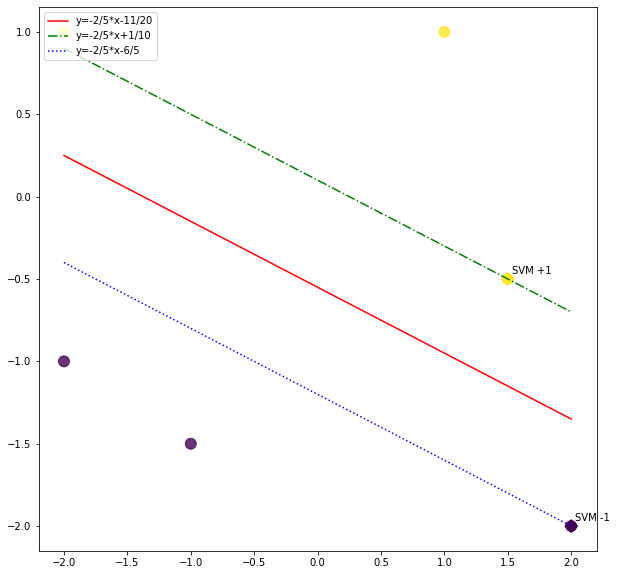

## 2.(3 points) Create a SVM-model and plot a 2D-SVM classification by using Python and colon data set (use only two genes, T62947 and H64807), and find your best hyper-parameters for precision, recall, and accuracy. (Training:Testing = 80:20)

In [ ]:
url ='https://raw.githubusercontent.com/ViktorHexCore/R_CEB/main/DataForRpartOne/colon.csv'
# url =r'/content/drive/MyDrive/Dataset/Assignment/colon.csv'
df_colon = pd.read_csv(url)
df_colon.head()

,H55933,R39465,R39465.1,R85482,U14973,R02593,T51496,H80240,T65938,T55131,...,R70790,L11706,T90549,D17390,M33210,H18490,H40891,R77780,T49647,Class
0,3.62,3.31,2.986154,2.71,2.091310,3.12,2.745517,2.42,3.352726,2.97,...,-1.030,-0.983356,-0.531,-1.142698,-1.110,-0.520386,-0.315,-1.764190,-2.75,1
1,3.47,3.68,3.425553,3.05,2.402400,2.46,2.150405,2.26,3.020793,3.26,...,-1.230,-3.063926,0.156,-0.687025,-0.777,-1.093455,-1.210,-1.062064,-2.13,1
2,3.02,2.78,2.569772,3.21,2.707560,2.63,2.385288,3.00,2.633958,2.40,...,-0.758,0.318488,-1.250,-1.099859,-0.131,-2.748068,-1.010,-2.260031,-1.50,1
3,3.10,2.86,2.772942,3.19,2.354082,2.76,2.103475,2.93,3.176524,2.84,...,-1.180,0.079492,-1.070,-0.465491,-0.455,-1.804783,-1.610,-1.223450,-1.07,1
4,3.01,2.91,2.560548,3.25,2.336800,3.04,2.881109,2.55,2.852425,2.57,...,-0.491,-0.081214,-1.160,-0.889998,-0.528,-1.636024,-1.210,-1.232686,-1.62,1


In [ ]:
df_colon.shape

(62, 2001)

In [ ]:
X = df_colon[['T62947','H64807']]
y = df_colon['Class']
X.head()

,T62947,H64807
0,-1.360,-1.470
1,-1.130,-0.830
2,-0.377,-0.147
3,-1.240,-0.173
4,-0.745,-0.420


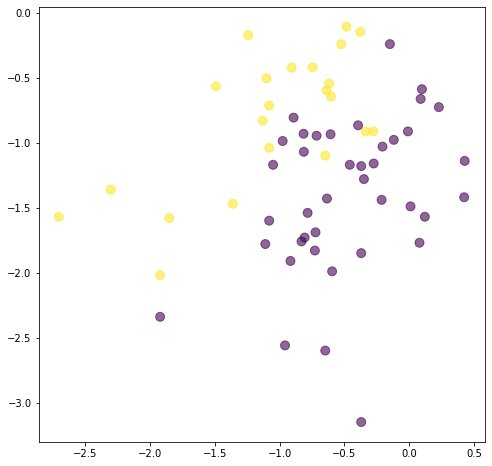

In [ ]:
plt.figure(figsize=(8,8))
plt.scatter(X['T62947'],X['H64807'],c=y,s=80,alpha=0.6)

In [ ]:
from sklearn.model_selection import train_test_split
seed = 6536115
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state=seed)
print(X_train.shape,
X_test.shape,
y_train.shape,
y_test.shape)

(49, 2) (13, 2) (49,) (13,)


In [ ]:
from sklearn.model_selection import GridSearchCV
# Set the parameters by cross-validation
# tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-2, 1e-3, 1e-4, 1e-5],
# 'C': [0.001, 0.10, 0.1, 10, 25, 50, 100, 1000]},
# {'kernel': ['sigmoid'], 'gamma': [1e-2, 1e-3, 1e-4, 1e-5],
# 'C': [0.001, 0.10, 0.1, 10, 25, 50, 100, 1000]},
# {'kernel': ['linear'], 'C': [0.001, 0.10, 0.1, 10, 25, 50, 100, 1000]}
# ]
tuned_parameters = {'C': [100,0.001, 0.10, 0.1, 1, 10, 25, 50, 100, 1000], 'gamma': [1,0.1,0.01,0.001, 1e-4, 1e-5],'kernel': ['rbf', 'poly', 'sigmoid']}


# scores = ['precision', 'recall','accuracy']
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score,classification_report,confusion_matrix

scores = {'precision': make_scorer(precision_score, average = 'macro'),
          'recall': make_scorer(recall_score, average = 'macro'),
          'accuracy': make_scorer(accuracy_score)}

In [ ]:
from sklearn.svm import SVC
import warnings 
warnings.filterwarnings("ignore")

In [ ]:
for score in scores:
  print("# Tuning hyper-parameters for %s" % score)
  print()

  clf = GridSearchCV(SVC(), tuned_parameters, verbose=1, scoring=score)

  clf.fit(X_train, y_train)
  print("Best parameters set found on development set:")
  print()
  print(clf.best_params_)
  print()
  print("Grid scores on development set:")
  print()
  means = clf.cv_results_['mean_test_score']
  stds = clf.cv_results_['std_test_score']
  for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std* 2, params))
  print()

# Tuning hyper-parameters for precision

Fitting 5 folds for each of 180 candidates, totalling 900 fits
Best parameters set found on development set:

{'C': 100, 'gamma': 0.1, 'kernel': 'sigmoid'}

Grid scores on development set:

0.498 (+/-0.526) for {'C': 100, 'gamma': 1, 'kernel': 'rbf'}
0.586 (+/-0.758) for {'C': 100, 'gamma': 1, 'kernel': 'poly'}
0.439 (+/-0.204) for {'C': 100, 'gamma': 1, 'kernel': 'sigmoid'}
0.760 (+/-0.449) for {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}
0.617 (+/-0.786) for {'C': 100, 'gamma': 0.1, 'kernel': 'poly'}
0.893 (+/-0.275) for {'C': 100, 'gamma': 0.1, 'kernel': 'sigmoid'}
0.767 (+/-0.400) for {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
0.000 (+/-0.000) for {'C': 100, 'gamma': 0.01, 'kernel': 'poly'}
0.767 (+/-0.400) for {'C': 100, 'gamma': 0.01, 'kernel': 'sigmoid'}
0.693 (+/-0.738) for {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0.000 (+/-0.000) for {'C': 100, 'gamma': 0.001, 'kernel': 'poly'}
0.600 (+/-0.980) for {'C': 100, 'gamma': 0.001, 'kernel': '

In [ ]:
clf.best_estimator_

SVC(C=100, gamma=0.1, kernel='sigmoid')

best estimator is (C=100, gamma=0.1, kernel='sigmoid')
for precision, recall, accuracy

In [ ]:
grid_predictions = clf.predict(X_test)
print(confusion_matrix(y_test,grid_predictions))
print(classification_report(y_test, grid_predictions))

[[8 1]
 [1 3]]
              precision    recall  f1-score   support

          -1       0.89      0.89      0.89         9
           1       0.75      0.75      0.75         4

    accuracy                           0.85        13
   macro avg       0.82      0.82      0.82        13
weighted avg       0.85      0.85      0.85        13



## 3.(4 points)Train a SVM-model by using colon-data set and tuning the hyper-parameters, and select the best model. (Training:Testing = 80:20) and give your comments.

In [ ]:
X = df_colon.drop('Class', axis=1)
y = df_colon['Class']
X.head()

,H55933,R39465,R39465.1,R85482,U14973,R02593,T51496,H80240,T65938,T55131,...,X67699,R70790,L11706,T90549,D17390,M33210,H18490,H40891,R77780,T49647
0,3.62,3.31,2.986154,2.71,2.091310,3.12,2.745517,2.42,3.352726,2.97,...,-0.705028,-1.030,-0.983356,-0.531,-1.142698,-1.110,-0.520386,-0.315,-1.764190,-2.75
1,3.47,3.68,3.425553,3.05,2.402400,2.46,2.150405,2.26,3.020793,3.26,...,-0.014318,-1.230,-3.063926,0.156,-0.687025,-0.777,-1.093455,-1.210,-1.062064,-2.13
2,3.02,2.78,2.569772,3.21,2.707560,2.63,2.385288,3.00,2.633958,2.40,...,0.143622,-0.758,0.318488,-1.250,-1.099859,-0.131,-2.748068,-1.010,-2.260031,-1.50
3,3.10,2.86,2.772942,3.19,2.354082,2.76,2.103475,2.93,3.176524,2.84,...,-0.300846,-1.180,0.079492,-1.070,-0.465491,-0.455,-1.804783,-1.610,-1.223450,-1.07
4,3.01,2.91,2.560548,3.25,2.336800,3.04,2.881109,2.55,2.852425,2.57,...,0.519280,-0.491,-0.081214,-1.160,-0.889998,-0.528,-1.636024,-1.210,-1.232686,-1.62


In [ ]:
from sklearn.model_selection import train_test_split
seed = 6536115
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state=seed)
print(X_train.shape,
X_test.shape,
y_train.shape,
y_test.shape)

(49, 2000) (13, 2000) (49,) (13,)


In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [100,0.001, 0.10, 0.1, 1, 10, 25, 50, 100, 1000], 'gamma': [1,0.1,0.01,0.001, 1e-4, 1e-5],'kernel': ['rbf', 'poly', 'sigmoid']}
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
# fitting the model for grid search
grid.fit(X_train, y_train)

Fitting 5 folds for each of 180 candidates, totalling 900 fits
[CV 1/5] END ........C=100, gamma=1, kernel=rbf;, score=0.700 total time=   0.1s
[CV 2/5] END ........C=100, gamma=1, kernel=rbf;, score=0.600 total time=   0.1s
[CV 3/5] END ........C=100, gamma=1, kernel=rbf;, score=0.600 total time=   0.1s
[CV 4/5] END ........C=100, gamma=1, kernel=rbf;, score=0.600 total time=   0.1s
[CV 5/5] END ........C=100, gamma=1, kernel=rbf;, score=0.667 total time=   0.1s
[CV 1/5] END .......C=100, gamma=1, kernel=poly;, score=0.900 total time=   0.1s
[CV 2/5] END .......C=100, gamma=1, kernel=poly;, score=0.700 total time=   0.1s
[CV 3/5] END .......C=100, gamma=1, kernel=poly;, score=1.000 total time=   0.1s
[CV 4/5] END .......C=100, gamma=1, kernel=poly;, score=0.700 total time=   0.1s
[CV 5/5] END .......C=100, gamma=1, kernel=poly;, score=0.778 total time=   0.1s
[CV 1/5] END ....C=100, gamma=1, kernel=sigmoid;, score=0.700 total time=   0.1s
[CV 2/5] END ....C=100, gamma=1, kernel=sigmoi

GridSearchCV(estimator=SVC(),
             param_grid={'C': [100, 0.001, 0.1, 0.1, 1, 10, 25, 50, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001, 1e-05],
                         'kernel': ['rbf', 'poly', 'sigmoid']},
             verbose=3)

In [ ]:
# print best parameter after tuning
print(grid.best_params_)
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 10, 'gamma': 0.001, 'kernel': 'sigmoid'}
SVC(C=10, gamma=0.001, kernel='sigmoid')


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
grid_predictions_colon_all = grid.predict(X_test)
print(confusion_matrix(y_test,grid_predictions_colon_all))
print(classification_report(y_test, grid_predictions_colon_all))

[[8 1]
 [1 3]]
              precision    recall  f1-score   support

          -1       0.89      0.89      0.89         9
           1       0.75      0.75      0.75         4

    accuracy                           0.85        13
   macro avg       0.82      0.82      0.82        13
weighted avg       0.85      0.85      0.85        13



# Assignment: kNN -due on 11 November, 2022 (10 points) 



## a. (5 points)
 - From colon.csv 
 - Sampling (choose your seed) a training set and a testing set = 80:20
 - Perform k-NN algorithm to predict which patient (sample) have a cancer by setting 
k = [ 1, 2, 4, 6, 8, 10, 12 ] and weights = distance, and using a testing set from previous step.


In [ ]:
X = df_colon.drop('Class', axis=1)
y = df_colon['Class']
X.head()

,H55933,R39465,R39465.1,R85482,U14973,R02593,T51496,H80240,T65938,T55131,...,X67699,R70790,L11706,T90549,D17390,M33210,H18490,H40891,R77780,T49647
0,3.62,3.31,2.986154,2.71,2.091310,3.12,2.745517,2.42,3.352726,2.97,...,-0.705028,-1.030,-0.983356,-0.531,-1.142698,-1.110,-0.520386,-0.315,-1.764190,-2.75
1,3.47,3.68,3.425553,3.05,2.402400,2.46,2.150405,2.26,3.020793,3.26,...,-0.014318,-1.230,-3.063926,0.156,-0.687025,-0.777,-1.093455,-1.210,-1.062064,-2.13
2,3.02,2.78,2.569772,3.21,2.707560,2.63,2.385288,3.00,2.633958,2.40,...,0.143622,-0.758,0.318488,-1.250,-1.099859,-0.131,-2.748068,-1.010,-2.260031,-1.50
3,3.10,2.86,2.772942,3.19,2.354082,2.76,2.103475,2.93,3.176524,2.84,...,-0.300846,-1.180,0.079492,-1.070,-0.465491,-0.455,-1.804783,-1.610,-1.223450,-1.07
4,3.01,2.91,2.560548,3.25,2.336800,3.04,2.881109,2.55,2.852425,2.57,...,0.519280,-0.491,-0.081214,-1.160,-0.889998,-0.528,-1.636024,-1.210,-1.232686,-1.62


In [ ]:
from sklearn.model_selection import train_test_split
seed = 6536115
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state=seed)
print(X_train.shape,
X_test.shape,
y_train.shape,
y_test.shape)

(49, 2000) (13, 2000) (49,) (13,)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh_dist = KNeighborsClassifier(n_neighbors=1,weights='distance')
neigh_dist.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1, weights='distance')

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
neigh_dist_predict = neigh_dist.predict(X_test)
print(confusion_matrix(y_test,neigh_dist_predict))
print(classification_report(y_test, neigh_dist_predict))

[[7 2]
 [0 4]]
              precision    recall  f1-score   support

          -1       1.00      0.78      0.88         9
           1       0.67      1.00      0.80         4

    accuracy                           0.85        13
   macro avg       0.83      0.89      0.84        13
weighted avg       0.90      0.85      0.85        13



In [ ]:
k_neigbors = [ 1, 2, 4, 6, 8, 10, 12 ] 
for n in k_neigbors:
  neigh_dist = KNeighborsClassifier(n_neighbors=n,weights='distance')
  neigh_dist.fit(X_train, y_train)
  neigh_dist_predict = neigh_dist.predict(X_test)
  print('N =',n)
  print(confusion_matrix(y_test,neigh_dist_predict))
  print(classification_report(y_test, neigh_dist_predict))

N = 1
[[7 2]
 [0 4]]
              precision    recall  f1-score   support

          -1       1.00      0.78      0.88         9
           1       0.67      1.00      0.80         4

    accuracy                           0.85        13
   macro avg       0.83      0.89      0.84        13
weighted avg       0.90      0.85      0.85        13

N = 2
[[7 2]
 [0 4]]
              precision    recall  f1-score   support

          -1       1.00      0.78      0.88         9
           1       0.67      1.00      0.80         4

    accuracy                           0.85        13
   macro avg       0.83      0.89      0.84        13
weighted avg       0.90      0.85      0.85        13

N = 4
[[8 1]
 [1 3]]
              precision    recall  f1-score   support

          -1       0.89      0.89      0.89         9
           1       0.75      0.75      0.75         4

    accuracy                           0.85        13
   macro avg       0.82      0.82      0.82        13
weighted av

## b. (5 points)
 - From your training set and test set in a
 - Perform k-NN algorithm to predict which patient (sample) have a cancer by setting 
k = [ 1, 2, 4, 6, 8, 10, 12 ] and weights = uniform, and using a testing set from 
previous step.
 - Compare the performance of the model from item a & b, and add your comments

In [ ]:
k_neigbors = [ 1, 2, 4, 6, 8, 10, 12 ] 
for n in k_neigbors:
  neigh_uni = KNeighborsClassifier(n_neighbors=n,weights='uniform')
  neigh_uni.fit(X_train, y_train)
  neigh_uni_predict = neigh_uni.predict(X_test)
  print('N =',n)
  print(confusion_matrix(y_test,neigh_uni_predict))
  print(classification_report(y_test, neigh_uni_predict))

N = 1
[[7 2]
 [0 4]]
              precision    recall  f1-score   support

          -1       1.00      0.78      0.88         9
           1       0.67      1.00      0.80         4

    accuracy                           0.85        13
   macro avg       0.83      0.89      0.84        13
weighted avg       0.90      0.85      0.85        13

N = 2
[[8 1]
 [4 0]]
              precision    recall  f1-score   support

          -1       0.67      0.89      0.76         9
           1       0.00      0.00      0.00         4

    accuracy                           0.62        13
   macro avg       0.33      0.44      0.38        13
weighted avg       0.46      0.62      0.53        13

N = 4
[[8 1]
 [1 3]]
              precision    recall  f1-score   support

          -1       0.89      0.89      0.89         9
           1       0.75      0.75      0.75         4

    accuracy                           0.85        13
   macro avg       0.82      0.82      0.82        13
weighted av

### both a. (weights='distance') and b(weights='uniform') accuracy,f1 increasing by but when n = 4 these values get plateau 
$$f1 = 0.89$$
$$accuracy = 0.85$$
$$recall = 0.89$$
$$precision = 0.89$$  
which is maximum and then plateau then the best parameter is n_neighbors = 4 and weights can be uniform or distance result will be the same at high n_neighbors more than 4